In [1]:
#importar librerias
import numpy as np
import gym
import random
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
number_of_buckets = (8,8,8,8,8,8,2,2) #buckets in each dimension

In [3]:
def create_env():
    return gym.make('LunarLander-v2')

In [4]:
def define_limits_states():
    
    
    state_value_bounds = np.zeros(shape=(8,2))
    state_value_bounds=state_value_bounds.tolist()
    state_value_bounds[0] = [-1, 1]  # Posición x,
    state_value_bounds[1] = [-1, 1]  # Posicion y
    state_value_bounds[2] = [-1, 1]  # velocidad x
    state_value_bounds[3] = [-1, 1]  # velocidad y 
    state_value_bounds[4] = [-1, 1]  # angulo
    state_value_bounds[5] = [-0.4, 0.4]  #velocidad angular
    state_value_bounds[6] = [0, 1]  # soporte izquierdo
    state_value_bounds[7] = [0, 1]  # soporte derecho
    return state_value_bounds

In [13]:
def discretize_space(state_value,number_of_buckets):
    bucket_indexes = []
    bucket_index = 0
    state_value_bounds = define_limits_states()
    for i in range(len(state_value)):
        bounds = np.linspace(state_value_bounds[i][0],state_value_bounds[i][1],number_of_buckets[i]-1)
        if len(bounds)==1:
            bucket_index=int(state_value[i])
        else:

            for j in range(len(bounds)):
                if j>=(number_of_buckets[i]-2):
                    bucket_index =number_of_buckets[i]-1
                    break
                if state_value[i]<=bounds[j]:
                    bucket_index = 0
                    break
                if state_value[i]>bounds[j] and state_value[i]<=bounds[j+1]:
                    bucket_index = j+1
                    break

        bucket_indexes.append(bucket_index)
    return tuple(bucket_indexes)


In [6]:
def select_action(env,state_index,exploration_rate,q_table):
    exploration_rate_threshold = random.uniform(0, 1)
    if exploration_rate_threshold > exploration_rate:  # Explota
        action = np.argmax(q_table[state_index])
    else:
        action = env.action_space.sample()              #explota
    return action

In [7]:
def create_q_table(number_of_buckets,action_space_size):
    #crear una nueva Q_table
    q_table = np.zeros(number_of_buckets + (action_space_size,))
    return q_table


In [8]:
def Qlearning():
    num_episodes = 20000
    step_plot = 100

    # parameters
    learning_rate = 0.1
    discount_rate = 0.99

    # epsilon greedy trade off
    exploration_rate = 1
    max_exploration_rate = 1
    min_exploration_rate = 0.01
    exploration_decay_rate = 0.001

    env = create_env()
    action_space_size = env.action_space.n

    q_table = create_q_table(number_of_buckets,action_space_size)


    total_rewards_table = np.zeros([int(num_episodes / step_plot)])
    max_steps = env._max_episode_steps

    rewards_all_episodes = []

    for episode in range(num_episodes):  # cada episodio
        # initialize new episode params
        state = env.reset()  # se resetea el ambiente a valores iniciales
        state_index = discretize_space(state,number_of_buckets)
        done = False  # True si el episodio ha terminado
        rewards_current_episode = 0  # recompesa del episodio

        for step in range(max_steps):  # Cada tiempo/paso del episodio
            #env.render()
            # Exploration-exploitation trade-off
            exploration_rate_threshold = random.uniform(0, 1)

            # epsilon greedy policy

            if exploration_rate_threshold > exploration_rate:  # Explota
                action = np.argmax(q_table[state_index])
            else:
                action = env.action_space.sample()  # Explora
            # Take new action
            new_state, reward, done, info = env.step(action)
            new_index_state = discretize_space(new_state,number_of_buckets)
            q_table[state_index][action] = q_table[state_index][action] + learning_rate * (reward + discount_rate * np.max(q_table[new_index_state]) - q_table[state_index][action])

            # Set new state
            # Add new reward
            state_index = new_index_state
            rewards_current_episode += reward

            if done == True:
                break
                # print("fin de episodio")
        rewards_all_episodes.append(rewards_current_episode)
        exploration_rate = max(min_exploration_rate,min(max_exploration_rate, 1.0 - math.log10((episode + 1) / (num_episodes * 0.1))))

        if episode % 100 == 0:
            print("Exploration_rate %f",exploration_rate)
            print("Episodio %d", episode)
            print(rewards_current_episode)

    print("Final del entrenamiento")


    return q_table, rewards_all_episodes

In [10]:
number_of_buckets

(8, 8, 8, 8, 8, 8, 2, 2)

In [21]:
n_times = 5
QL_tables = []
QL_rewards = []

for number in range(n_times):
    print("\n ********** Training number ", number)
    q_table,rewards = Qlearning()
    QL_tables.append(q_table)
    QL_rewards.append(rewards)


 ********** Training number  0
Exploration_rate %f 1
Episodio %d 0
-380.6549306736361
Exploration_rate %f 1
Episodio %d 100
-108.0232485690302
Exploration_rate %f 1
Episodio %d 200
-84.14538894805037
Exploration_rate %f 1
Episodio %d 300
-394.1166376284612
Exploration_rate %f 1
Episodio %d 400
-88.17478523627722
Exploration_rate %f 1
Episodio %d 500
-237.49459176111847
Exploration_rate %f 1
Episodio %d 600
-247.88182826709848
Exploration_rate %f 1
Episodio %d 700
-530.7640109289732
Exploration_rate %f 1
Episodio %d 800
-377.8244158444489
Exploration_rate %f 1
Episodio %d 900
-141.5654735363048
Exploration_rate %f 0.9995659225206814
Episodio %d 1000
-454.2776771584222
Exploration_rate %f 0.9582126810282482
Episodio %d 1100
-56.664105247021425
Exploration_rate %f 0.9204569925970939
Episodio %d 1200
-142.7070280787044
Exploration_rate %f 0.8857227034384137
Episodio %d 1300
-294.2347925082436
Exploration_rate %f 0.8535618647142253
Episodio %d 1400
-85.3693786462644
Exploration_rate %f 0.8

Exploration_rate %f 0.8857227034384137
Episodio %d 1300
-168.54023968609283
Exploration_rate %f 0.8535618647142253
Episodio %d 1400
-66.96670907081528
Exploration_rate %f 0.8236193077567296
Episodio %d 1500
-251.78031132720147
Exploration_rate %f 0.7956086680807003
Episodio %d 1600
-212.2489324855985
Exploration_rate %f 0.769295686387431
Episodio %d 1700
-124.64757721019753
Exploration_rate %f 0.7444862871804667
Episodio %d 1800
-86.28805999232245
Exploration_rate %f 0.7210178831345568
Episodio %d 1900
-59.59959549551725
Exploration_rate %f 0.6987529113637887
Episodio %d 2000
-120.21357299392287
Exploration_rate %f 0.6775739475940474
Episodio %d 2100
-68.96342353942188
Exploration_rate %f 0.657379957446652
Episodio %d 2200
-104.5966896395592
Exploration_rate %f 0.6380833813313566
Episodio %d 2300
-135.6651056189553
Exploration_rate %f 0.6196078399429727
Episodio %d 2400
-38.33914681581295
Exploration_rate %f 0.6018863082694975
Episodio %d 2500
-70.59447097206953
Exploration_rate %f 0.5

Exploration_rate %f 0.6196078399429727
Episodio %d 2400
5.717360977740697
Exploration_rate %f 0.6018863082694975
Episodio %d 2500
-46.64978955395091
Exploration_rate %f 0.5848596478041272
Episodio %d 2600
-56.95042819305352
Exploration_rate %f 0.5684754158125491
Episodio %d 2700
-75.24221390329087
Exploration_rate %f 0.5526868911764318
Episodio %d 2800
2.858262743136194
Exploration_rate %f 0.537452271197336
Episodio %d 2900
-110.0819220984936
Exploration_rate %f 0.5227340045751474
Episodio %d 3000
-95.65733555218102
Exploration_rate %f 0.5084982337626736
Episodio %d 3100
-53.26975741260354
Exploration_rate %f 0.4947143258558677
Episodio %d 3200
-70.7352990126144
Exploration_rate %f 0.4813544756696885
Episodio %d 3300
-3.1352782542208644
Exploration_rate %f 0.4683933680672778
Episodio %d 3400
-79.07597854685777
Exploration_rate %f 0.4558078892349674
Episodio %d 3500
-124.3371605131781
Exploration_rate %f 0.44357687862871464
Episodio %d 3600
-34.38174616243619
Exploration_rate %f 0.43168

Exploration_rate %f 0.4558078892349674
Episodio %d 3500
-68.92699346038721
Exploration_rate %f 0.44357687862871464
Episodio %d 3600
-103.35161665289247
Exploration_rate %f 0.43168091490488814
Episodio %d 3700
-30.082006246822758
Exploration_rate %f 0.42010213039689615
Episodio %d 3800
38.58908590914484
Exploration_rate %f 0.4088240496882086
Episodio %d 3900
-5.772386466311104
Exploration_rate %f 0.39783144862100284
Episodio %d 4000
-36.46274674548924
Exploration_rate %f 0.38711023071251527
Episodio %d 4100
7.863317947012732
Exploration_rate %f 0.37664731846200805
Episodio %d 4200
-108.03843302035489
Exploration_rate %f 0.36643055744590813
Episodio %d 4300
-22.59949294243188
Exploration_rate %f 0.35644863143705485
Episodio %d 4400
-55.946572164740715
Exploration_rate %f 0.346690987061521
Episodio %d 4500
-179.08369902615055
Exploration_rate %f 0.33714776673520386
Episodio %d 4600
22.0445857550135
Exploration_rate %f 0.3278097488117475
Episodio %d 4700
-79.58429112330268
Exploration_rate

Exploration_rate %f 0.33714776673520386
Episodio %d 4600
-78.77610354325697
Exploration_rate %f 0.3278097488117475
Episodio %d 4700
-11.607879266698532
Exploration_rate %f 0.3186682940308342
Episodio %d 4800
-3.29537771847707
Exploration_rate %f 0.30971529748737037
Episodio %d 4900
-84.66069220739232
Exploration_rate %f 0.30094314545233225
Episodio %d 5000
-65.50734663687939
Exploration_rate %f 0.2923446764688131
Episodio %d 5100
-103.38662256916137
Exploration_rate %f 0.28391314622516794
Episodio %d 5200
-45.628143681262
Exploration_rate %f 0.2756421957735735
Episodio %d 5300
-52.13692118342981
Exploration_rate %f 0.26752582271880654
Episodio %d 5400
-88.57883996752356
Exploration_rate %f 0.25955835505023406
Episodio %d 5500
9.430944063888802
Exploration_rate %f 0.2517344273312593
Episodio %d 5600
-42.089260173289986
Exploration_rate %f 0.2440489589958681
Episodio %d 5700
65.40070067712203
Exploration_rate %f 0.23649713453240295
Episodio %d 5800
-3.382259047147528
Exploration_rate %f 

In [22]:
QL_mean = np.mean(np.array(QL_rewards),axis=0)
np.save('QL_mean', QL_mean)
np.save('QL_tables', QL_tables)

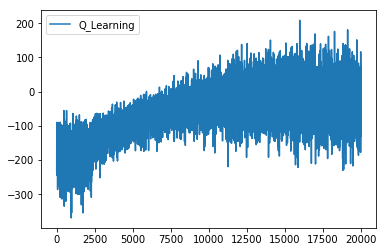

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

x = np.linspace(0, 20000, QL_mean.size)
plt.plot(x, QL_mean, label='Q_Learning')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [28]:
#env = create_env()
q_tables = np.load('QL_tables.npy')
q_table = q_tables[0]
number_of_buckets = (8,8,8,8,8,8,2,2)

state_value_bounds = define_limits_states()
env = create_env()
bucket_state = discretize_space(env.reset(),number_of_buckets)

print("State ", bucket_state)
print("Q(s,·) ", q_table[bucket_state])

State  (3, 7, 3, 5, 4, 4, 0, 0)
Q(s,·)  [25.16607972 25.11967154 25.13395767 25.27359513]


In [30]:
total_test_episodes = 10
q_tables = np.load('QL_tables.npy')
q_table = q_tables[0]
rewards = []
max_env_steps = env._max_episode_steps
state_value_bounds = define_limits_states()
number_of_buckets = (8,8,8,8,8,8,2,2)
# ******* Loop for each episode:
for episode in range(total_test_episodes):
    #print("***Episode*** ", episode)
    
    # Control variables
    total_rewards = 0
    done =  False
    
    # ******* Initialize S
    # Reset the environment getting the initial state
    state_index = discretize_space(env.reset(),number_of_buckets)
    
    # *******Loop for each step of episode:
    for step in range(max_env_steps):
        env.render()
        
        #******* Choose A from S using policy derived from Q (greedy in this case)
        action = np.argmax(q_table[state_index])
        #print(action)
        
        # ******* Take the action A, observe R, S'
        new_state, reward, done, info = env.step(action)
        new_state_index = discretize_space(new_state,number_of_buckets)
        
        # new_state is now the current state
        state_index =  new_state_index
        
        total_rewards += reward
        
        if done:
            rewards.append(total_rewards)
            print("Score ", total_rewards)
            break
                
env.close()
print("\nAverage score " + str(sum(rewards)/total_test_episodes))

Score  -21.299158974808577
Score  -94.95457343745922
Score  -2.0779647701044297
Score  -83.89701231685193
Score  -70.46969571584651
Score  -535.7598822943625
Score  -86.84202129824084
Score  -40.416679688353746
Score  -106.78788611636382
Score  -78.1695946869556

Average score -112.06744692993473
